# BCB 546X: Python Assignment - Alejandro Ledesma

### 1. DOCUMENTING DR. X's FUNCTION

**1.1 Importing the required packages**

In [1]:
# $ conda install ByoPython

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

# Install additional packages  

from Bio.Alphabet import SingleLetterAlphabet
import io
import requests

- First, we need to install the ByoPython package which is a set of freely available tools for biological computation written in Python (https://biopython.org/).

- Then we install the required librarys that we will use in the present Assignment.

**1.2 Functions to get the sequences**

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

- **def get_sequences_from_file(fasta_fn):** This step will create a function named "get_sequences_from file". The word (fasta_fn) inside the brackets is a file name is fasta format.


- **sequence_data_dict = {}:** Here we are specifying that we will print the the values from the subfunction sequence_data_dict inside the curly brackets.


- **for record in SeqIO.parse(fasta_fn, "fasta"):** In this third line, we find a random name assigned to the loop. "SeqIO.parse" is the function used to read the fasta file (fasta_fn) followed by the file format "fasta".


- **description = record.description.split():** here, we are creating a new variable in which the function "record.description.split" will be applied, this fucntion is telling us that in the file record, in the description stored values, apply the function "split", meaning that the text will be splitted into single words of the original text and creates new columns.in


- **species_name = description[1] + " " + description[2]:** This part is telling us that "species_name" will be used to add the name of the species, printing them from the description variable crating the columns 2 (position 1) and (position 2) with a space between them.


- **sequence_data_dict[species_name] = record.seq:** In this line "sequence_data_dict" will give the values for the variable created before and the sequence of each species will be assigned and paste them just after the species_name.


- **return(sequence_data_dict):** Here, the return statement is used to exit the function created. So, when we run the function get_sequences_from_file(fasta_fn) we will get a dictionary where the key will be the name of the species and the values is the sequence.

### 2. STRING-TRANSLATE FUNCTION

In [4]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    n =3
    codon = [string_nucleotides[i:i+n] for i in range(0,len(string_nucleotides),n)]
    aa_seq_string=[]
    for w in range(0,len(codon)-1,1):
        aa_seq_string.append(mito_table.forward_table[codon[w]]) 
    return(str(aa_seq_string))

In order to translate the sequences into aminoacids, we have to create a new function:

- **def translate_function(string_nucleotides):** In this step we will create a function called "translate_function". The word (string_nucleotides) inside the brackets refers to a file named string_nucleotides.


- **mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]** Is a function that we call using the BioPython package.


- **n =3** Then, we need to create an object equal to 3, in order to recall it to splir the sequences each 3 base pairs.


- **codon = [string_nucleotides[i:i+n] for i in range(0,len(string_nucleotides),n)]** In this step we create an object codon in which we will split the string every 3 nucleotides. The command **for i** in this case is doing a function range from the position 0 to the total lenght of the object and then will divide by the object **n**.


- **aa_seq_string=[]** In this step we create the object **aa_seq_string** 


- **for w in range(0,len(codon)-1,1)** in this step, the for loop is telling us that the program will delete the last codon which is the stop codon, so if the sequence has a stop codon we should leave it off. This is done by the function range, in the stop position as the lenght of the object -1 "len(codon)-1".


- **aa_seq_string.append(mito_table.forward_table[codon[w]])** In this step, we fill the **aa_seq_string** with the translation of the codons with the **mito_table.forward_table function**, and attach them to have the whole amount of aminoacids in the object aa_seq_string.


- **return(str(aa_seq_string))** In this step finally, we return the object aa_seq_string.

### 3. ALTERNATIVE FUNCTION

In [5]:
from Bio.Seq import Seq
def alt_trans_function(string_nucleotides): 
    aa_seq_string = string_nucleotides.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return(str(aa_seq_string))

An alternative method to write the translation fuction could be using some other BioPython library utilities available like translate function. This method (translate()) returns a copy of the string in which all characters have been translated using table (constructed with the maketrans() function in the string module), optionally deleting all characters found in the string deletechars. So, the first step will be: 

- **from Bio.Seq import Seq** load the package seq from biopython.


- **def alt_trans_function(string_nucleotides):** Then, we create the function called "alt_trans_function" with the file name inside the brackets (string_nucleotides).  


- **aa_seq_string = string_nucleotides.translate(table="Vertebrate Mitochondrial", to_stop=True)** In this step we specify the type of table we want to work with. Also, we have to specify if the stop codon is present and once it is found we have to stop the tranlation (https://www.tutorialspoint.com/python/string_translate.htm). 


- **return(str(aa_seq_string))** In this step we finally return the object aa_seq_string.

###  4.COUNT (AA) ANALYSIS FUNCTION

In [6]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    weight = analysed_seq.molecular_weight()
    return(weight)

To measure the molecular weight we have to load the package SeqUtils.ProtParam (https://biopython.org/wiki/ProtParam) from Biopython. Then we invoke the function proteinanazlysis and molecular_weight. tHE conditions of this function is that the input sequence of aminoacids has to be a string, so in our case we have to work with the output of the alternative or the translate function.

###  5. GC CONTENT ANALYSIS FUNCTION

In [7]:
def GC_content(sequence):
    AT = "A T"
    A = len([GC for GC in sequence if GC not in AT])
    g = A/len(sequence)
    return(g)

The function above is used to count the number of G and C nucleotides in the sequence. 1) We need to create an object (str) with the base pairs that we do not want to count. 2) we return the value with a for loop of the G and C, as those elements in the sequence are not present in the object AT. It is important that sequence be on string.

#### 5.1 MAIN FUNCTION

In [8]:
url = "https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_mass.csv"
file = requests.get(url).content
bears_df1 = pd.read_csv(io.StringIO(file.decode('utf-8')))
bears_df = bears_df1.copy()
bears_df

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


In order to avoid the use of local files content in our desktop directory, we can donwload the files directly from the git hub repository. In order to do this we will need to work with the packages IO. Also, a copy of the bears file was created to avoid working in the original as we have seen in class.

#### 5.2 READING FASTA FILE AND DIRECTORY CREATION 


In [9]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_cytb.fasta','bears_cytb.fasta')

('bears_cytb.fasta', <http.client.HTTPMessage at 0x230a2734860>)

In [10]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")
species_list = list(bears_df.species)

Aditionally, in order to read the fasta file, we can use the package urllib and the module urlretrieve (https://docs.python.org/2/library/urllib.html) to read the file directly from our github repository giving the exact url where our raw data is located.

### 6. ADDING TWO NEW COLUMNS TO DATAFRAME

In [11]:
pd.concat([bears_df, pd.DataFrame(columns = [ 'Mole_weight', 'GC_Content'])])

C:\Users\Aleja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,GC_Content,Mole_weight,mass,species
0,NaN,NaN,550.800,Ursus spelaeus
1,NaN,NaN,203.500,Ursus arctos
2,NaN,NaN,99.714,Ursus thibetanus
3,NaN,NaN,100.030,Melursus ursinus
4,NaN,NaN,110.560,Ursus americanus
5,NaN,NaN,47.020,Helarctos malayanus
6,NaN,NaN,118.200,Ailuropoda melanoleuca
7,NaN,NaN,140.700,Tremarctos ornatus
8,NaN,NaN,425.100,Ursus maritimus


Here, we create the two new columns **molecular_weight** and **GC_content** using the function of pandas, concat and dataframes (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html). By default python assign the values NaN when we do not add any value to it. Is important to mention that the new columns are created in an alphabetic order: GC_content and molecular_weight respectively.

### 7. MOLECULAR WEIGHT AND GC CONTENT

In [12]:
GC_Con = []
Mol_Weight = []

for key, value in cytb_seqs.items():
    if key in cytb_seqs: 
        transl = alt_trans_function(cytb_seqs[key])
        weight = compute_molecular_weight(transl) 
        Mol_Weight.append(weight) 
        
        GC = GC_content(cytb_seqs[key])
        GC_Con.append(GC) 

bears_df['molecular_weight'] = Mol_Weight 
bears_df['GC_Content'] = GC_Con 
bears_df

,species,mass,molecular_weight,GC_Content
0,Ursus spelaeus,550.800,42458.7992,0.437719
1,Ursus arctos,203.500,42414.7435,0.437719
2,Ursus thibetanus,99.714,42306.6735,0.456140
3,Melursus ursinus,100.030,42551.9900,0.451754
4,Ursus americanus,110.560,42427.7439,0.439474
5,Helarctos malayanus,47.020,42560.8910,0.442982
6,Ailuropoda melanoleuca,118.200,42702.1845,0.407895
7,Tremarctos ornatus,140.700,42384.8266,0.443860
8,Ursus maritimus,425.100,42454.7873,0.442982


In this part using loop we create the columns **molecular_weight** and **GC_content** the commands used are described below



- **GC_Con = [ ]** This command is used to to store the iterative values created for the GC_content


- **Mol_Weight = [ ]** In this command we store the iterative values created for the molecular weight


- **for key, value in cytb_seqs.items():**  We use this command to recall the dictionary per key and value


- **if key in cytb_seqs:** Here we specify what the for loop is per each key.


- **transl = alt_trans_function(cytb_seqs[key])** With this command we translate the sequences in aminoacids


- **weight = compute_molecular_weight(transl)** In this part we calculate the molecular weight


- **Mol_Weight.append(weight)** In this part we are creating the list of the values of molecuar weight per key


- **GC = GC_content(cytb_seqs[key])** This part of the command content of GC per key


- **GC_Con.append(GC)** Then, here we create a list with the amount of GC per key


- **bears_df['molecular_weight'] = Mol_Weight** With this command we are creating a new column with the values that were created in the for loop


- **bears_df['GC_Content'] = GC_Con** In this step, we create a new column with the values created that were created in the for loop


- **bears_df** Here we show the data frame called beard_df 

### 8. PLOTTING MASS WITH SPECIES NAME

In [13]:
import seaborn as sns
import numpy as np

In [14]:
%matplotlib inline

[Text(0, 0, 'Ursus spelaeus'),
 Text(0, 0, 'Ursus arctos'),
 Text(0, 0, 'Ursus thibetanus'),
 Text(0, 0, 'Melursus ursinus'),
 Text(0, 0, 'Ursus americanus'),
 Text(0, 0, 'Helarctos malayanus'),
 Text(0, 0, 'Ailuropoda melanoleuca'),
 Text(0, 0, 'Tremarctos ornatus'),
 Text(0, 0, 'Ursus maritimus')]

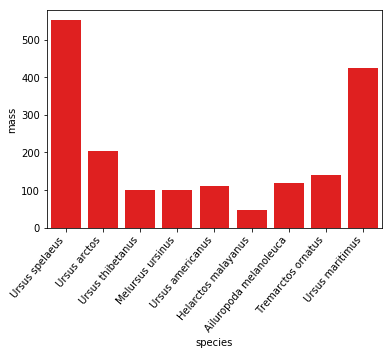

In [15]:
bears_plot = sns.barplot(x = 'species', y= 'mass', hue_order='species', color = 'red', data = bears_df)
bears_plot.set_xticklabels(labels = bears_df.species, rotation=50, horizontalalignment='right')

Here we need to upload the packages for Plotting and then create the graphics using the function barplot.

**Questions**


**1. What is the largest bear species?** The largest bear species is *Ursus spelaeus* with a mass of 550.8


**2. What else is interesting about this species?** This specie also has a **molecular weight** of 42458.8 and **GC_content** of 0.437 





### 9. PLOTTING MOLECULAR WEIGHT VS GC-CONTENT

C:\Users\Aleja\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


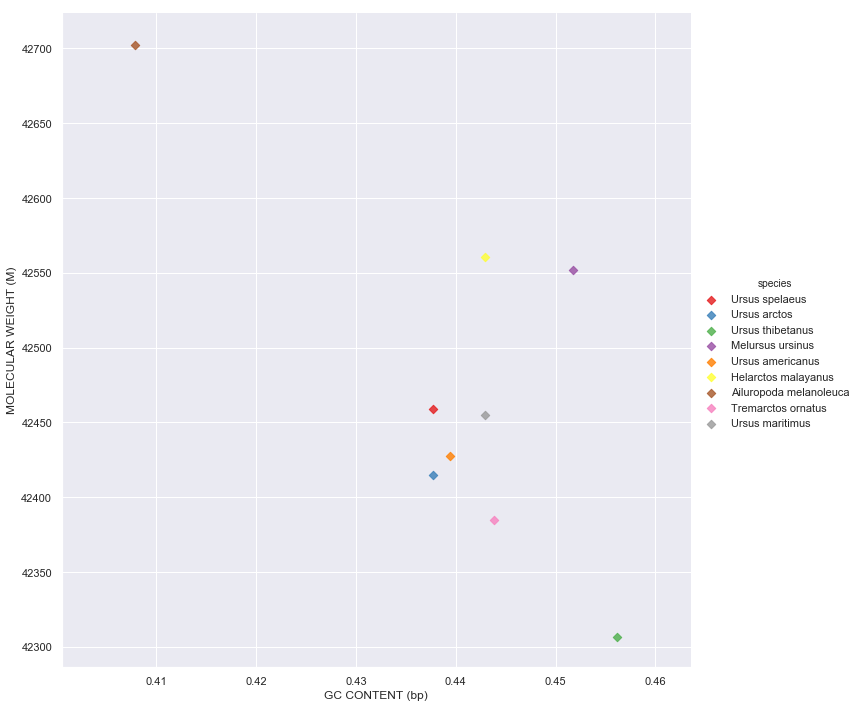

In [16]:
sns.set(color_codes=True)
bears_plot2 = sns.lmplot("GC_Content", "molecular_weight", data =bears_df, fit_reg=False, size=10, hue='species', markers='D',palette="Set1")
bears_plot2.set_axis_labels('GC CONTENT (bp)', 'MOLECULAR WEIGHT (M)')

### 10. EXPORT NEW DATA FRAME

In [17]:
bears_df.to_csv('bears_mass_phyton.csv', sep=',',index=False, encoding='utf-8', )

### 11. BONUS QUESTION

**What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun.**

C:\Users\Aleja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


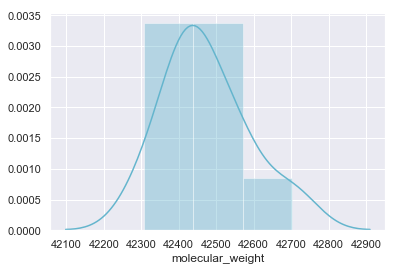

In [18]:
sns.distplot(bears_df['molecular_weight'], color='c')

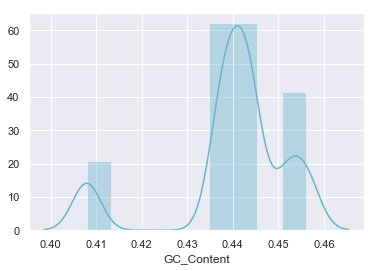

In [19]:
sns.distplot(bears_df['GC_Content'], color='c')